In [24]:
import numpy as np
import scipy as sp
import scipy.stats as sps
from scipy.stats import norm
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [27]:
def cross(*args):  # Can put either 1 or 2 things into this function
    x = args[0]
    if len(args)==1:
        y = x
    else:
        y = args[1]
    return(x.T.dot(y))
ls = lambda X,y: np.linalg.solve(cross(X),cross(X,y))
class ols:
    def __init__(self,X,y):
        self.n = X.shape[0]
        self.r = X.shape[1]
        self.X = np.hstack((np.ones((self.n,1)),X))
        self.y = y
        self.b = ls(self.X,self.y)
        self.pred = self.X.dot(self.b)
        self.res = self.y-self.pred
        RSS = cross(self.res)[0,0]
        ybar = self.y.mean()
        e_0 = self.y-ybar
        TSS = cross(e_0)[0,0]
        self.rsq = 1-RSS/TSS
        sig = np.sqrt(RSS/self.n)
        self.vcov = np.linalg.inv(cross(self.X))*(sig**2)
        self.loglike = -self.n/2*np.log(2*np.pi*sig**2)-self.n/2
        self.aic = 2*self.r-2*self.loglike
        self.bic = np.log(self.n)*self.r-2*self.loglike
    def predict(self,newX):
        newn = newX.shape[0]
        newX = np.hstack((np.ones((newn,1)),newX))
        return newX.dot(self.b)
    def tidy(self):
        se = np.sqrt(np.diag(self.vcov)).reshape(-1,1)
        tstats = self.b/se
        pval = norm.cdf(-np.abs(tstats))*2
        outp = np.hstack((self.b,se,tstats,pval))
        outp = pd.DataFrame(outp)
        outp.columns = ['beta','stderr','tstat','pval']
        print(outp)
        print("RSq="+str(self.rsq)) 
        print("AIC="+str(self.aic))
        print("BIC="+str(self.bic))

In [26]:
class quat:
    def __init__(self,*args):
        if len(args)==4:
            self.a = args[0]
            self.b = args[1]
            self.c = args[2]
            self.d = args[3]
        elif len(args) == 1:
            self.a = args[0]
            self.b = 0
            self.c = 0
            self.d = 0
        else:
            raise ValueError('Wrong number of inputs to constructor.')
    def __str__(self):
        return str(self.a)+"+"+str(self.b)+"i+"+str(self.c)+"j+"+str(self.d)+"k"
    def __add__(self,other):
        if type(other) == quat:
            return quat(self.a+other.a,self.b+other.b,self.c+other.c,self.d+other.d)
        else:
            return self+quat(other)
    def __mul__(self,other):
        if type(other) == quat:
            return quat(self.a*other.a-self.b*other.b-self.c*other.c-self.d*other.d,\
                        self.a*other.b+self.b*other.a+self.c*other.d-self.d*other.c,\
                        self.a*other.c+self.c*other.a-self.b*other.d+self.d*other.b,\
                        self.a*other.d+self.d*other.a+self.b*other.c-self.c*other.b)
        else:
            return quat(other*self.a,other*self.b,other*self.c,other*self.d)
    def __rmul__(self,other):
        if type(other) == quat:
            return other.__mul__(self)
        else:
            return quat(other*self.a,other*self.b,other*self.c,other*self.d)
    def __sub__(self,other):
        if type(other) == quat:
            return quat(self.a-other.a,self.b-other.b,self.c-other.c,self.d-other.d)
        else:
            return self-quat(other)
    def norm(self):
        return np.sqrt(self.a**2+self.b**2+self.c**2+self.d**2)
    def inv(self):
        den = self.norm()**2
        return quat(self.a/den,-self.b/den,-self.c/den,-self.d/den)

In [23]:
x = quat(5)
y = quat(0,4,0,0)
z = quat(1,1,1,1)
print(x)
print(x+y)
print(x-y)
print(2*x)
print(x.inv())
print(x*y)
print(x*z)


5+0i+0j+0k
5+4i+0j+0k
5+-4i+0j+0k
10+0i+0j+0k
0.2+0.0i+0.0j+0.0k
0+20i+0j+0k
5+5i+5j+5k


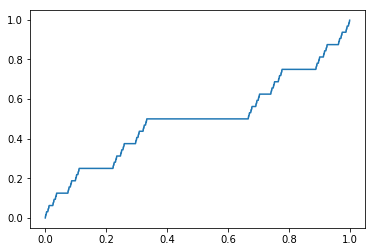

In [5]:
def repr(x,lb,ub,level,shift):
    if level >= 10: return shift
    trng = (ub-lb)/3
    if x < lb+trng:
        return repr(x,lb,lb+trng,level+1,shift)
    shift+=1/2**level
    if x <= lb+2*trng:
        return shift
    return repr(x,lb+2*trng,ub,level+1,shift)
def cdf(x):
    return repr(x,0.0,1.0,1,0)

x = np.linspace(0,1,10000)
y = x.copy()
for i in range(x.shape[0]):
    y[i] = cdf(x[i])
plt.plot(x,y)
plt.show()

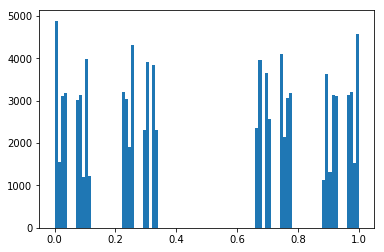

In [21]:
n = 100000
u = np.random.uniform(size=(n,))
cl = u.copy()
for i in range(n):
    item = u[i]
    cl[i] = x[np.argmin((y-item)**2)]
plt.hist(cl,bins=np.linspace(0,1,101))
plt.show()